# Neural Network

We now use a simple Neural Network to solve the same XOR problem we solved with Logistic Regression in *LogisticRegression.ipynb*.

In [1]:
import keras
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import Dense
from keras import backend as K
from keras.callbacks import Callback, History 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
import itertools

2025-06-21 16:24:27.786459: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-21 16:24:27.795518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750519467.805654  212138 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750519467.808857  212138 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-21 16:24:27.820507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "font.size": 14,
    "figure.dpi": 300})

## Loading the XOR data set

In [3]:
#Check in LogisticRegression.ipynb the code written to generate these files.
X = np.loadtxt('InputData/XOR-X_train.dat')
y = np.loadtxt('InputData/XOR-y_train.dat')
X = X[:,0:2] #The Neural Network is supposed to learn the decision boundary without us giving the quadratic term in the inputs.

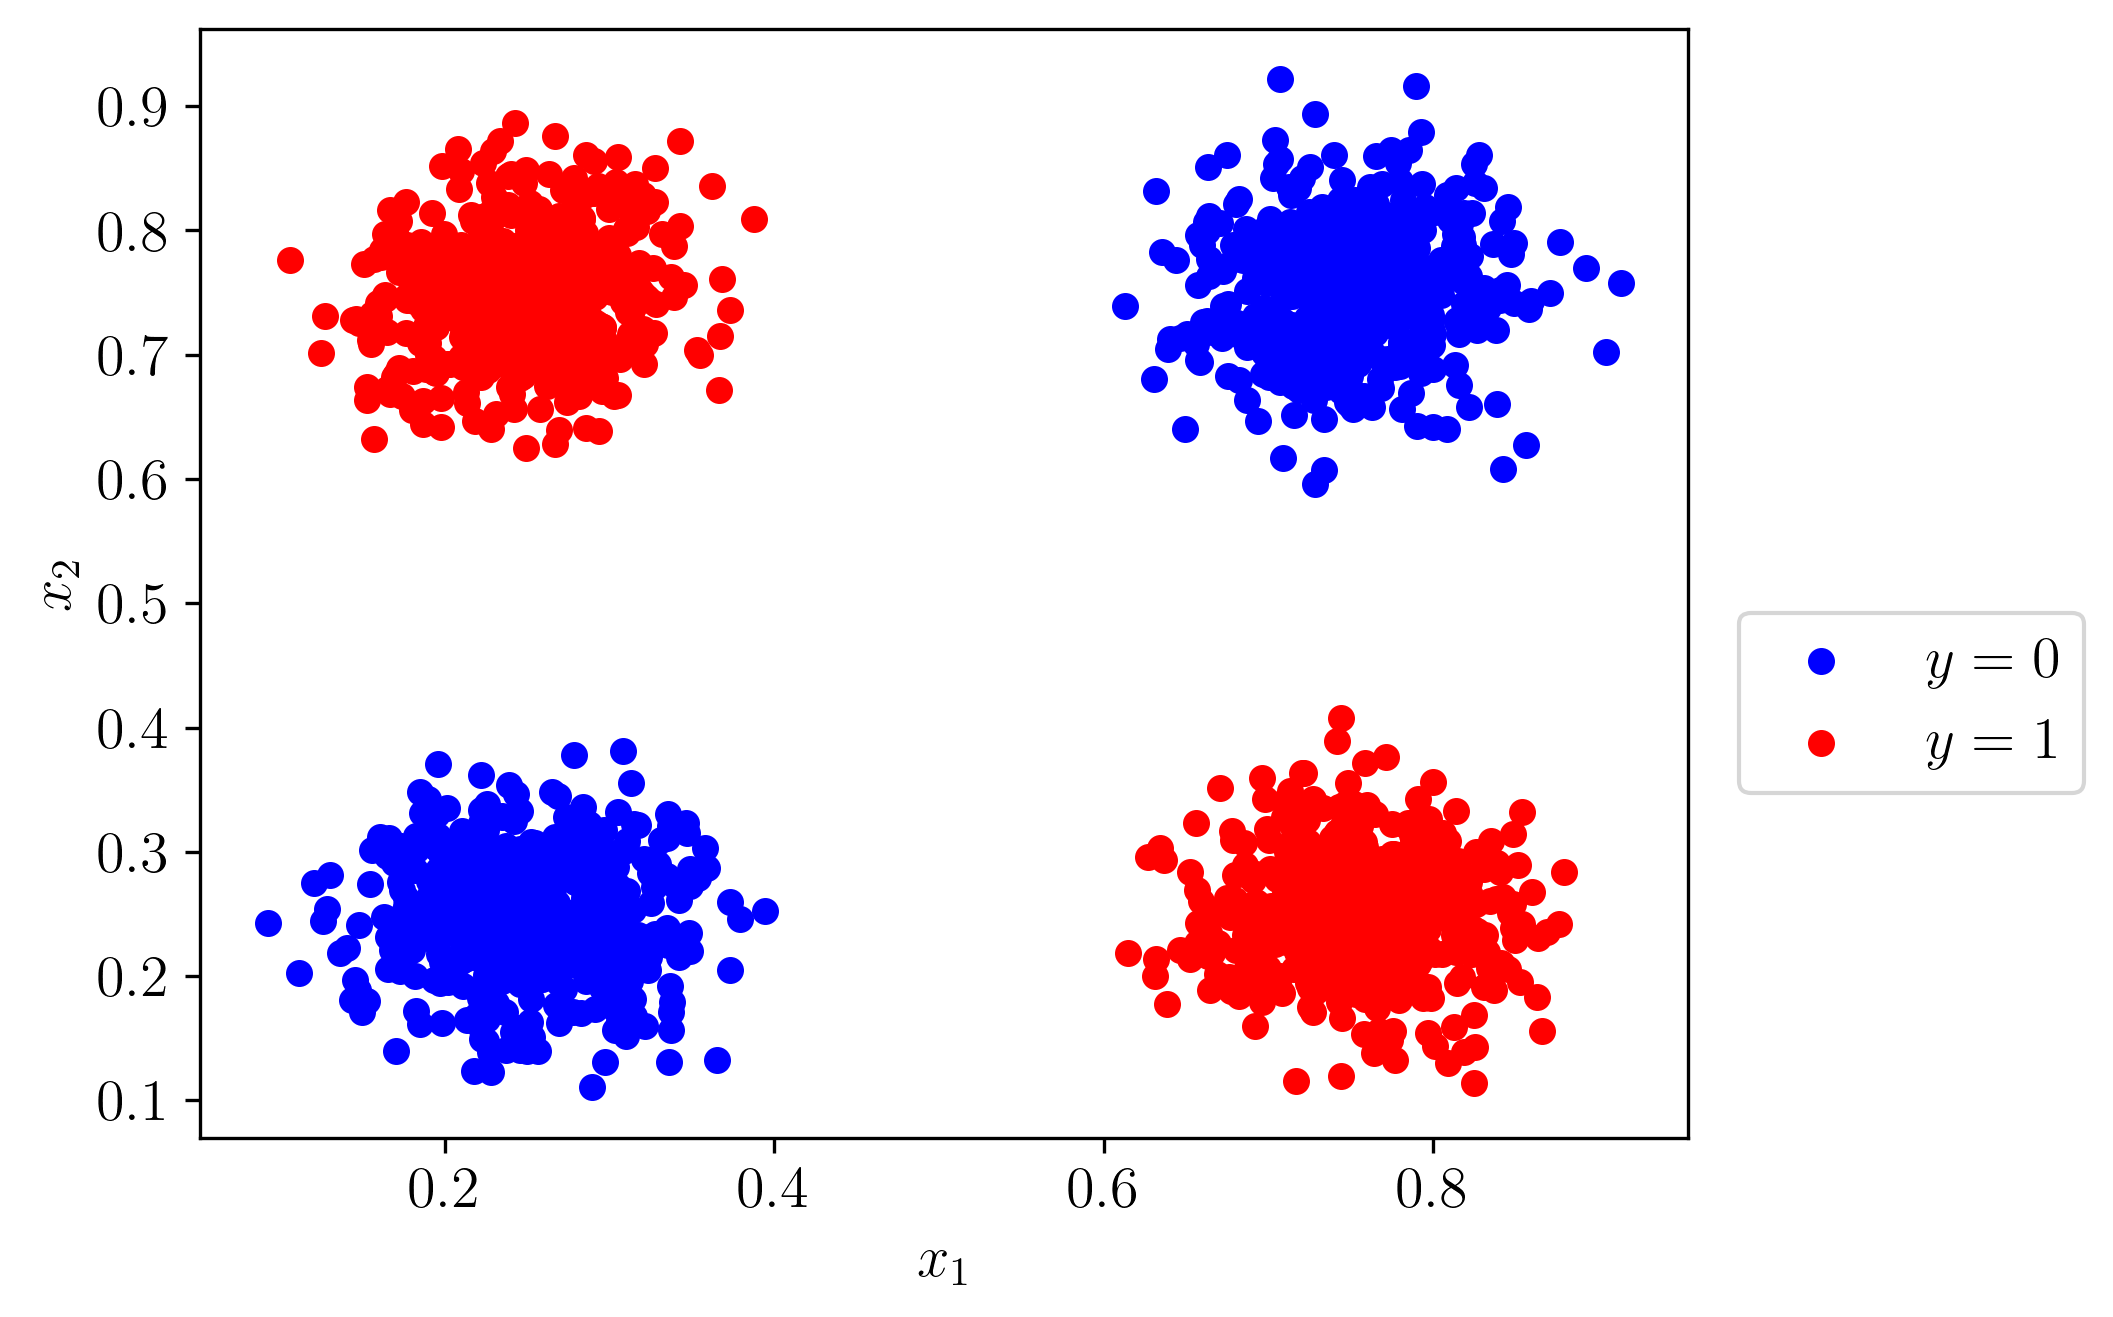

In [4]:
X0 = X[y == 0]
X1 = X[y == 1]

plt.scatter(x=X0[:,0], y=X0[:,1], s=30, marker="o", color='b')
plt.scatter(x=X1[:,0], y=X1[:,1], s=30, marker="o", color='r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend([r'$y=0$', r'$y=1$'], loc='upper center', bbox_to_anchor=(1.15, 0.5))
#plt.savefig('Plots/XOR_dataset.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

## Training the neural network

In [5]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [6]:
num_classes = 1
num_features = 2
batch_size = 2000 #We use batch gradient descent (our data set has 2000 events).
epochs = 500

In [7]:
def build_model(optimizer):
    """
    Builds a logistic regression model.

    Args:
        optimizer: Optimizer to train the model.

    Returns:
        model
    """
    model=Sequential()
    bce = tf.keras.losses.BinaryCrossentropy()
    model.add(Dense(2, activation='tanh', input_dim=num_features, 
                    kernel_regularizer=regularizers.L2(5e-4), 
                    bias_regularizer=regularizers.L2(5e-4)))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.compile(loss=bce, optimizer=optimizer, metrics=['accuracy'])
    return model

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.2)

model = build_model(opt)
model.summary()

I0000 00:00:1750519469.555840  212138 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9638 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/joao/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist=model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[LossHistory()])

Epoch 1/500


I0000 00:00:1750519470.282348  212208 service.cc:148] XLA service 0x74cf880047c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750519470.282363  212208 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-06-21 16:24:30.291892: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750519470.335719  212208 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.5000 - loss: 0.8648
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2915 - loss: 0.7283
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0.7162
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.7337
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.7252
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.7071
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7395 - loss: 0.6968
Epoch 8/500


I0000 00:00:1750519470.523212  212208 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3945 - loss: 0.6988
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.7064
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.7105
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.7081
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.7021
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6966
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5120 - loss: 0.6939
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6942
Epoch 16/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6960
Epoch 17/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.6973
Epoch 18/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0.6968
Epoch 19/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 1.0000
Epoch 168/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 1.0000
Epoch 169/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 1.0000
Epoch 170/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 1.0000
Epoch 171/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 1.0000
Epoch 172/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 1.0000
Epoch 173/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 1.0000
Epoch 174/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 1.0000
Epoch 175/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 1.0000
Epoch 176/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 1.0000
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 332/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 333/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 334/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 335/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 336/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 337/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 338/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 339/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 340/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 1.0000


In [10]:
model.save_weights("OutputData/NN-weights.weights.h5")

## Plotting the decision boundary

In [11]:
model.load_weights("OutputData/NN-weights.weights.h5")

In [12]:
print(model.get_weights())

[array([[-2.9969337, -3.0243354],
       [ 2.9339728,  2.997721 ]], dtype=float32), array([-0.7129075 ,  0.76280344], dtype=float32), array([[ 13.212915],
       [-13.102834]], dtype=float32), array([10.794818], dtype=float32)]


In [13]:
w1_00 = model.get_weights()[1][0]
w1_01 = model.get_weights()[1][1]
w1_10 = model.get_weights()[0][0][0]
w1_11 = model.get_weights()[0][0][1]
w1_20 = model.get_weights()[0][1][0]
w1_21 = model.get_weights()[0][1][1]
w2_0 = model.get_weights()[3][0]
w2_1 = model.get_weights()[2][0][0]
w2_2 = model.get_weights()[2][1][0]

print(w1_00, w1_01)
print(w1_10, w1_11)
print(w1_20, w1_21)
print("\n")
print(w2_0)
print(w2_1)
print(w2_2)

-0.7129075 0.76280344
-2.9969337 -3.0243354
2.9339728 2.997721


10.794818
13.212915
-13.102834


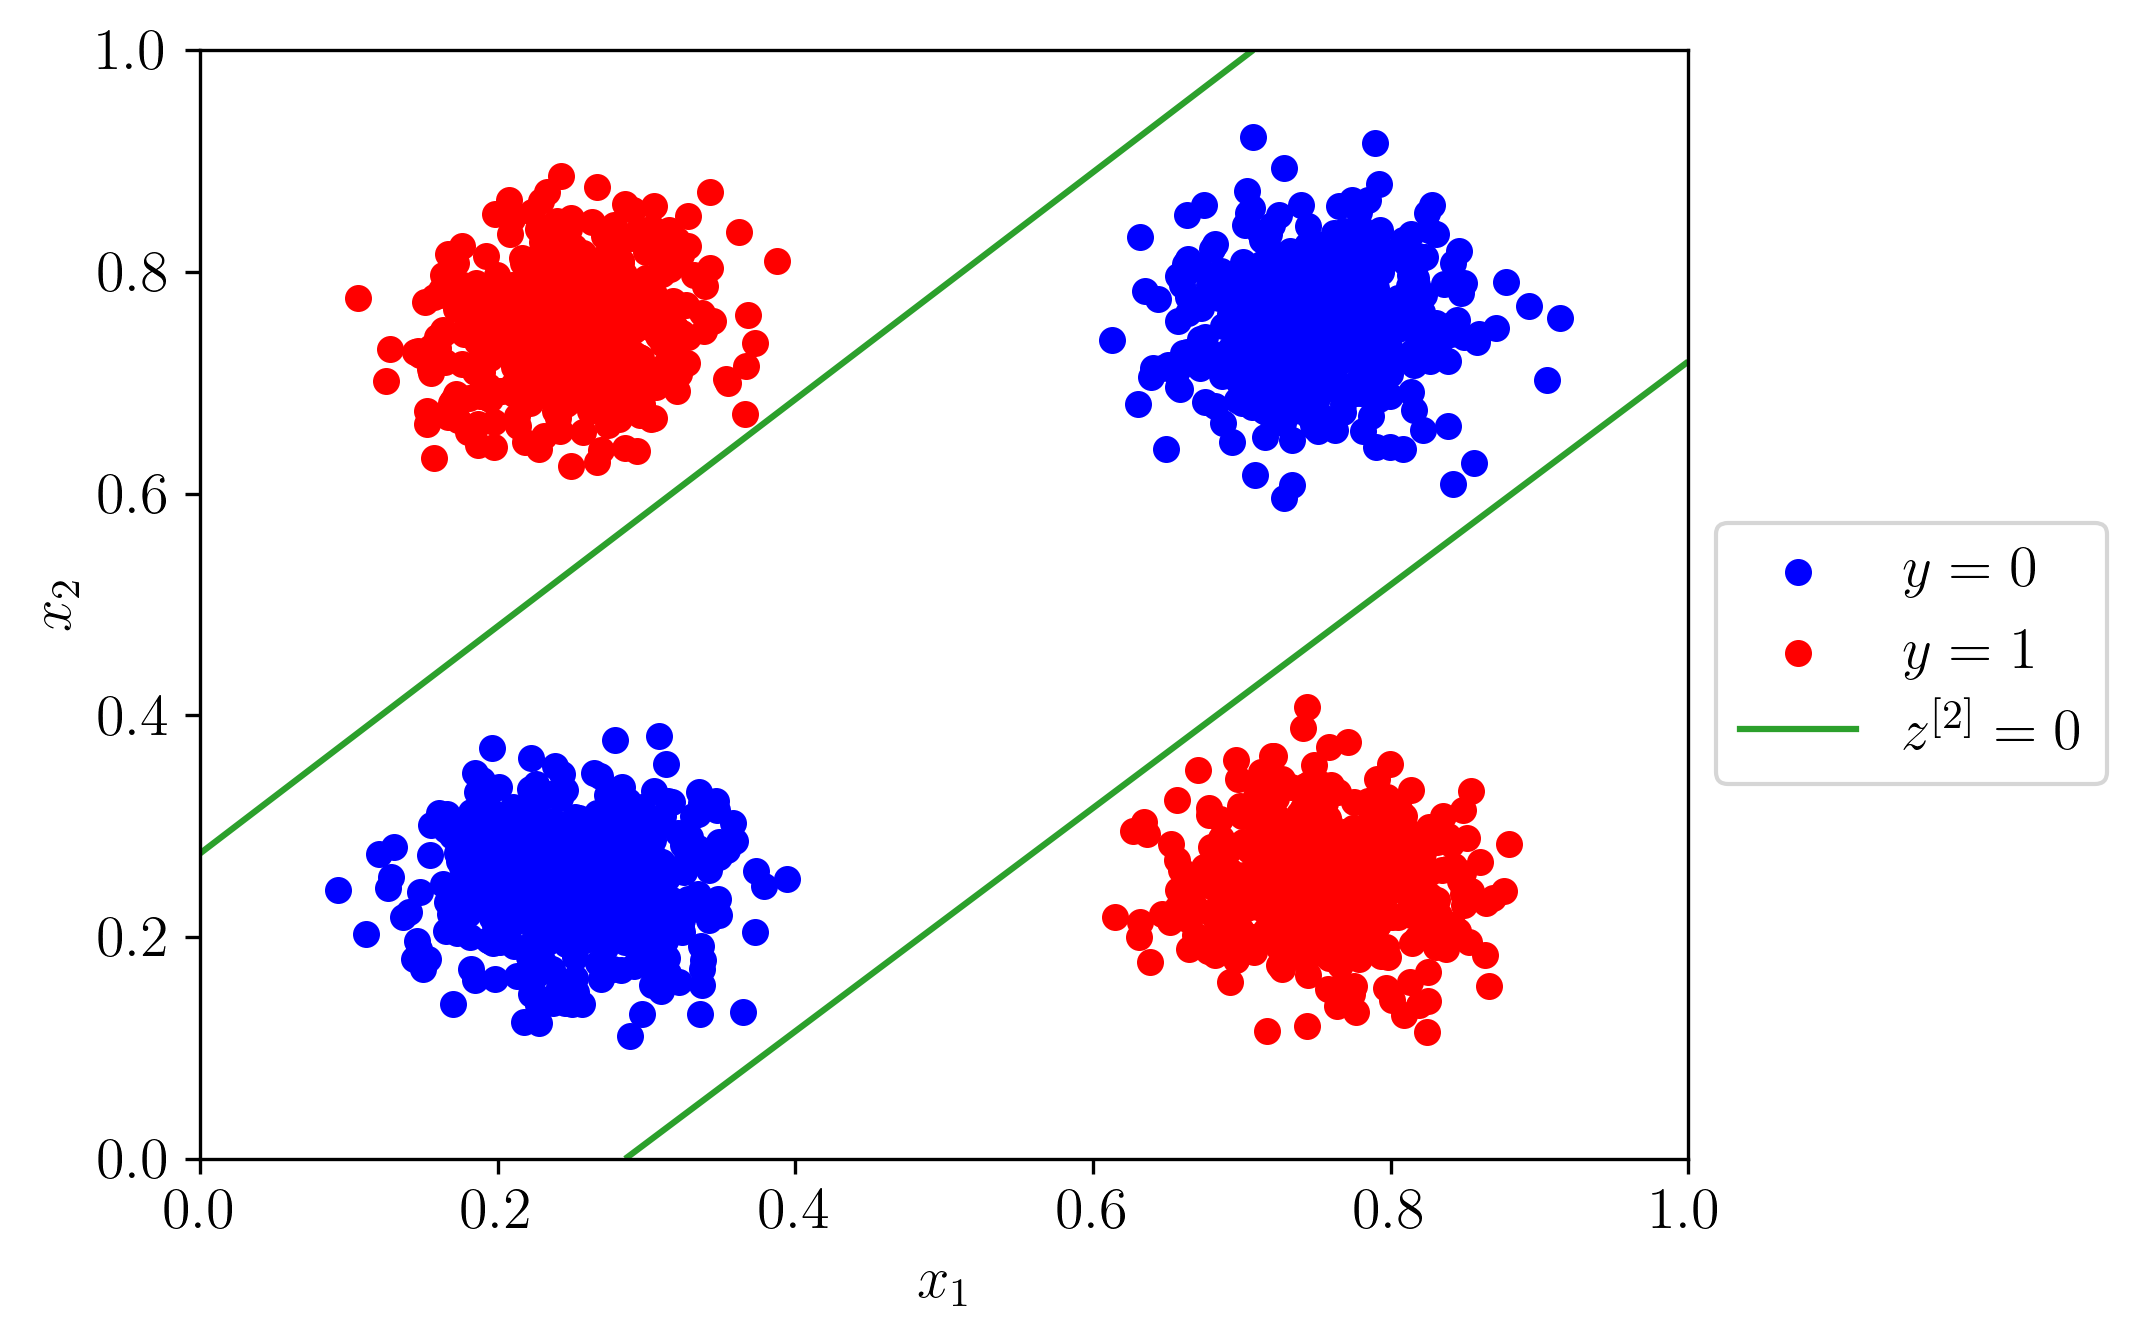

In [14]:
x1range = np.linspace(0, 1, 1000)
x2range = np.linspace(0, 1, 1000)
xg, yg = np.meshgrid(x1range, x2range)
zg = np.zeros_like(xg)
#Obtaining the decision boundary
for i,j in itertools.product(range(1000), range(1000)):
    zg[i,j] = w2_0 + w2_1*np.tanh(w1_00 + w1_10*xg[i,j] + w1_20*yg[i,j]) + w2_2*np.tanh(w1_01 + w1_11*xg[i,j] + w1_21*yg[i,j])

X0 = X[y == 0]
X1 = X[y == 1]

s0 = plt.scatter(x=X0[:,0], y=X0[:,1], s=30, marker="o", color='b', label='$y=0$')
s1 = plt.scatter(x=X1[:,0], y=X1[:,1], s=30, marker="o", color='r', label='$y=1$')
CS = plt.contour(xg, yg, zg, [0.0], colors='C2', zorder=2)
green_line = mlines.Line2D([], [], color='C2', label=r'$z^{[2]}=0$', zorder=2)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend(handles=[s0, s1, green_line], loc='upper center', bbox_to_anchor=(1.15, 0.6))
plt.savefig('Plots/NN-XOR_fit.png', bbox_inches='tight', pad_inches=0.01)
plt.show()